# Marketing Campaign For Banking Products

Bank is has a growing customer base. The bank wants to increase borrowers (asset customers) base to bring in more loan business and earn more through the interest on loans. So , bank wants to convert the liability based customers to personal loan customers. (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. The department wants to build a model that will help them identify the potential customers who have higher probability of purchasing the loan. This will increase the success ratio while at the same time reduce the cost of the campaign.



# 1 Importing the Required Libraries and the Dataset


In [ ]:
#importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns
%matplotlib inline

In [ ]:
data = pd.read_excel(r'C:\Users\Nayan Kumar\Desktop\Bank_Personal_Loan_Modelling.xlsx','Data')

In [ ]:
#To display top 5 row
data.head()


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
#to dislpays the columns
data.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [ ]:
#to display the last 5 rows
data.tail()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


There are 12 features.The aim is to construct a model that can  identify potential customers who have a higher probability of purchasing loan. Output column is personal loan. Features are detailed below:

ID:                      Customer ID
Age:                     Customer's age in completed years
Experience:              Number years of professional experience
Income:                  Annual income of the customer
ZIPCode:                 Home Address ZIP code.
Family:                  Family size of the customer
CCAvg :                  Avg. Spending on credit cards per month
Education:               Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
Mortgage:                Value of house mortgage if any.
Personal Loan:           Did this customer accept the personal loan offered in the last campaign?
Securities Account:      Does the customer have a securities account with the bank?
CD Account:              Does the customer have a certificate of deposit (CD) account with the bank?
Online:                  Does the customer use internet banking facilities?
CreditCard:              Does the customer use a credit card issued by UniversalBank?



# 1.1 Checking the type of data and basic summary

In [ ]:
data.shape

(5000, 14)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [ ]:
data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [ ]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937913,1.747666,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [ ]:
data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

# 2. Dropping Irrelevant Columns

In a machine learning,it is neccessary to seperate signal from the noice.Hence the ID column which definitely doesn't have any signal is being dropped.Also ,the experiance column seens to have faulty data as soon values are negative.We can replace and impute those values,but i choose to drop this column as well ,as it seems to be highly correlated with the age column.


In [ ]:
experience=data['Experience']
age=data['Age']
correlation=experience.corr(age)
correlation

0.9942148569683319

In [ ]:
data=data.drop(['ID','Experience'],axis=1)
data.head()

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,45,91330,4,1.0,2,0,0,0,0,0,1


# 3. EDA 

In [ ]:
#number of unique in each column
data.nunique()

Age                    45
Income                162
ZIP Code              467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

ZIP Code has 467 distinct values.
It is nominal variable which has too many levels.
It's better to drop ZIP Code as well.

In [ ]:
data.drop('ZIP Code', axis=1)

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4995,29,40,1,1.9,3,0,0,0,0,1,0
4996,30,15,4,0.4,1,85,0,0,0,1,0
4997,63,24,2,0.3,3,0,0,0,0,0,0
4998,65,49,3,0.5,2,0,0,0,0,1,0


In [ ]:
#Number of people with zero mortage
(data.Mortgage==0).sum()

3462

In [ ]:
#Number of people with 0 credit card spending  per month
(data.CCAvg==0).sum()


106

In [ ]:
# Value count for all categorial columns
data.Family.value_counts()

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

In [ ]:
data.Education.value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

In [ ]:
data['Securities Account'].value_counts()

0    4478
1     522
Name: Securities Account, dtype: int64

In [ ]:
data['CD Account'].value_counts()

0    4698
1     302
Name: CD Account, dtype: int64

In [ ]:
data['CreditCard'].value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

In [ ]:
data.Online.value_counts()

1    2984
0    2016
Name: Online, dtype: int64

# Univariate Analysis 

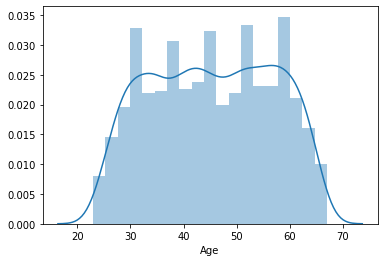

In [ ]:
# Univariate Analysis
# Age seems to have a symmetric distribution
sns.distplot(data.Age);

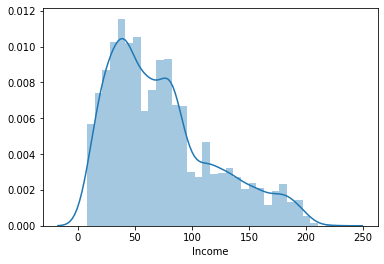

In [ ]:
# Income is right skewed Distribution
sns.distplot(data.Income);

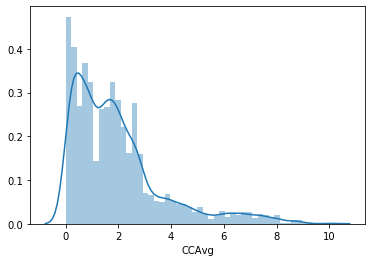

In [ ]:
# Credit Card Average is right skewed Distribution
sns.distplot(data.CCAvg);

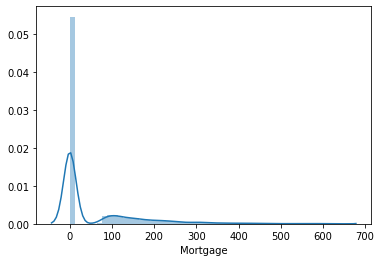

In [ ]:
# Mortgage seems to be highly skewed
sns.distplot(data.Mortgage);

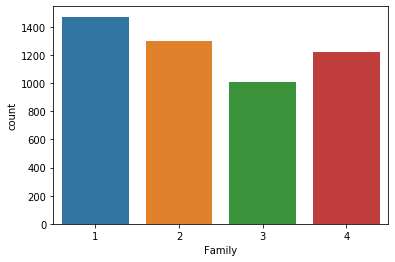

In [ ]:
sns.countplot(data.Family);

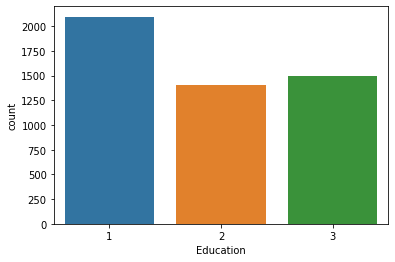

In [ ]:
sns.countplot(data.Education);

# MultiVariate Analysis


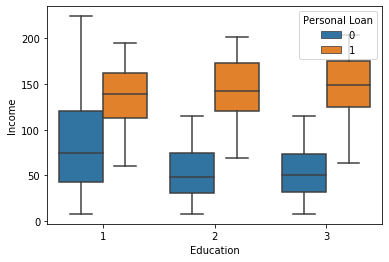

In [ ]:
# It seems that the customers who has more Income is granted loan across each Education level
sns.boxplot(x='Education', y='Income',hue='Personal Loan', data=data);

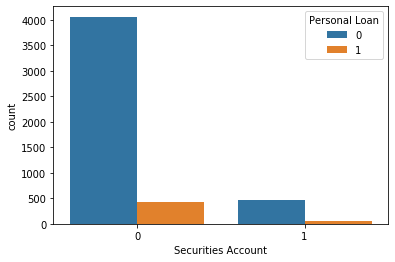

In [ ]:
# Majority of people having Security Account don't have Personal loan
sns.countplot(x='Securities Account', hue='Personal Loan',data=data);

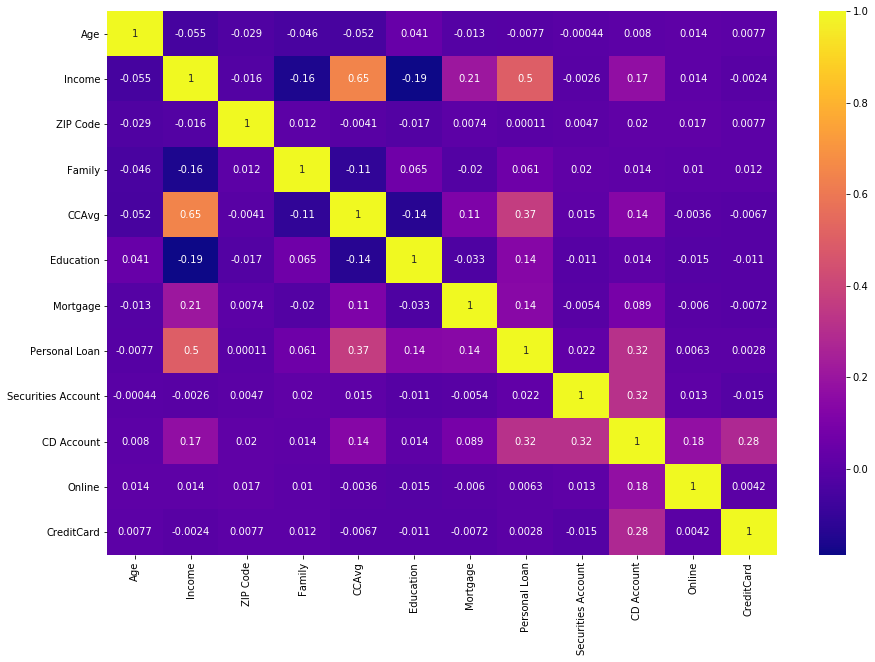

In [ ]:
# After dropping experience column earlier doesn't seem to be significant correlation between other object variable
# Credit Card Average and Income
fig,ax=plot.subplots(figsize=(15,10))
sns.heatmap(data.corr(),cmap='plasma',annot=True);

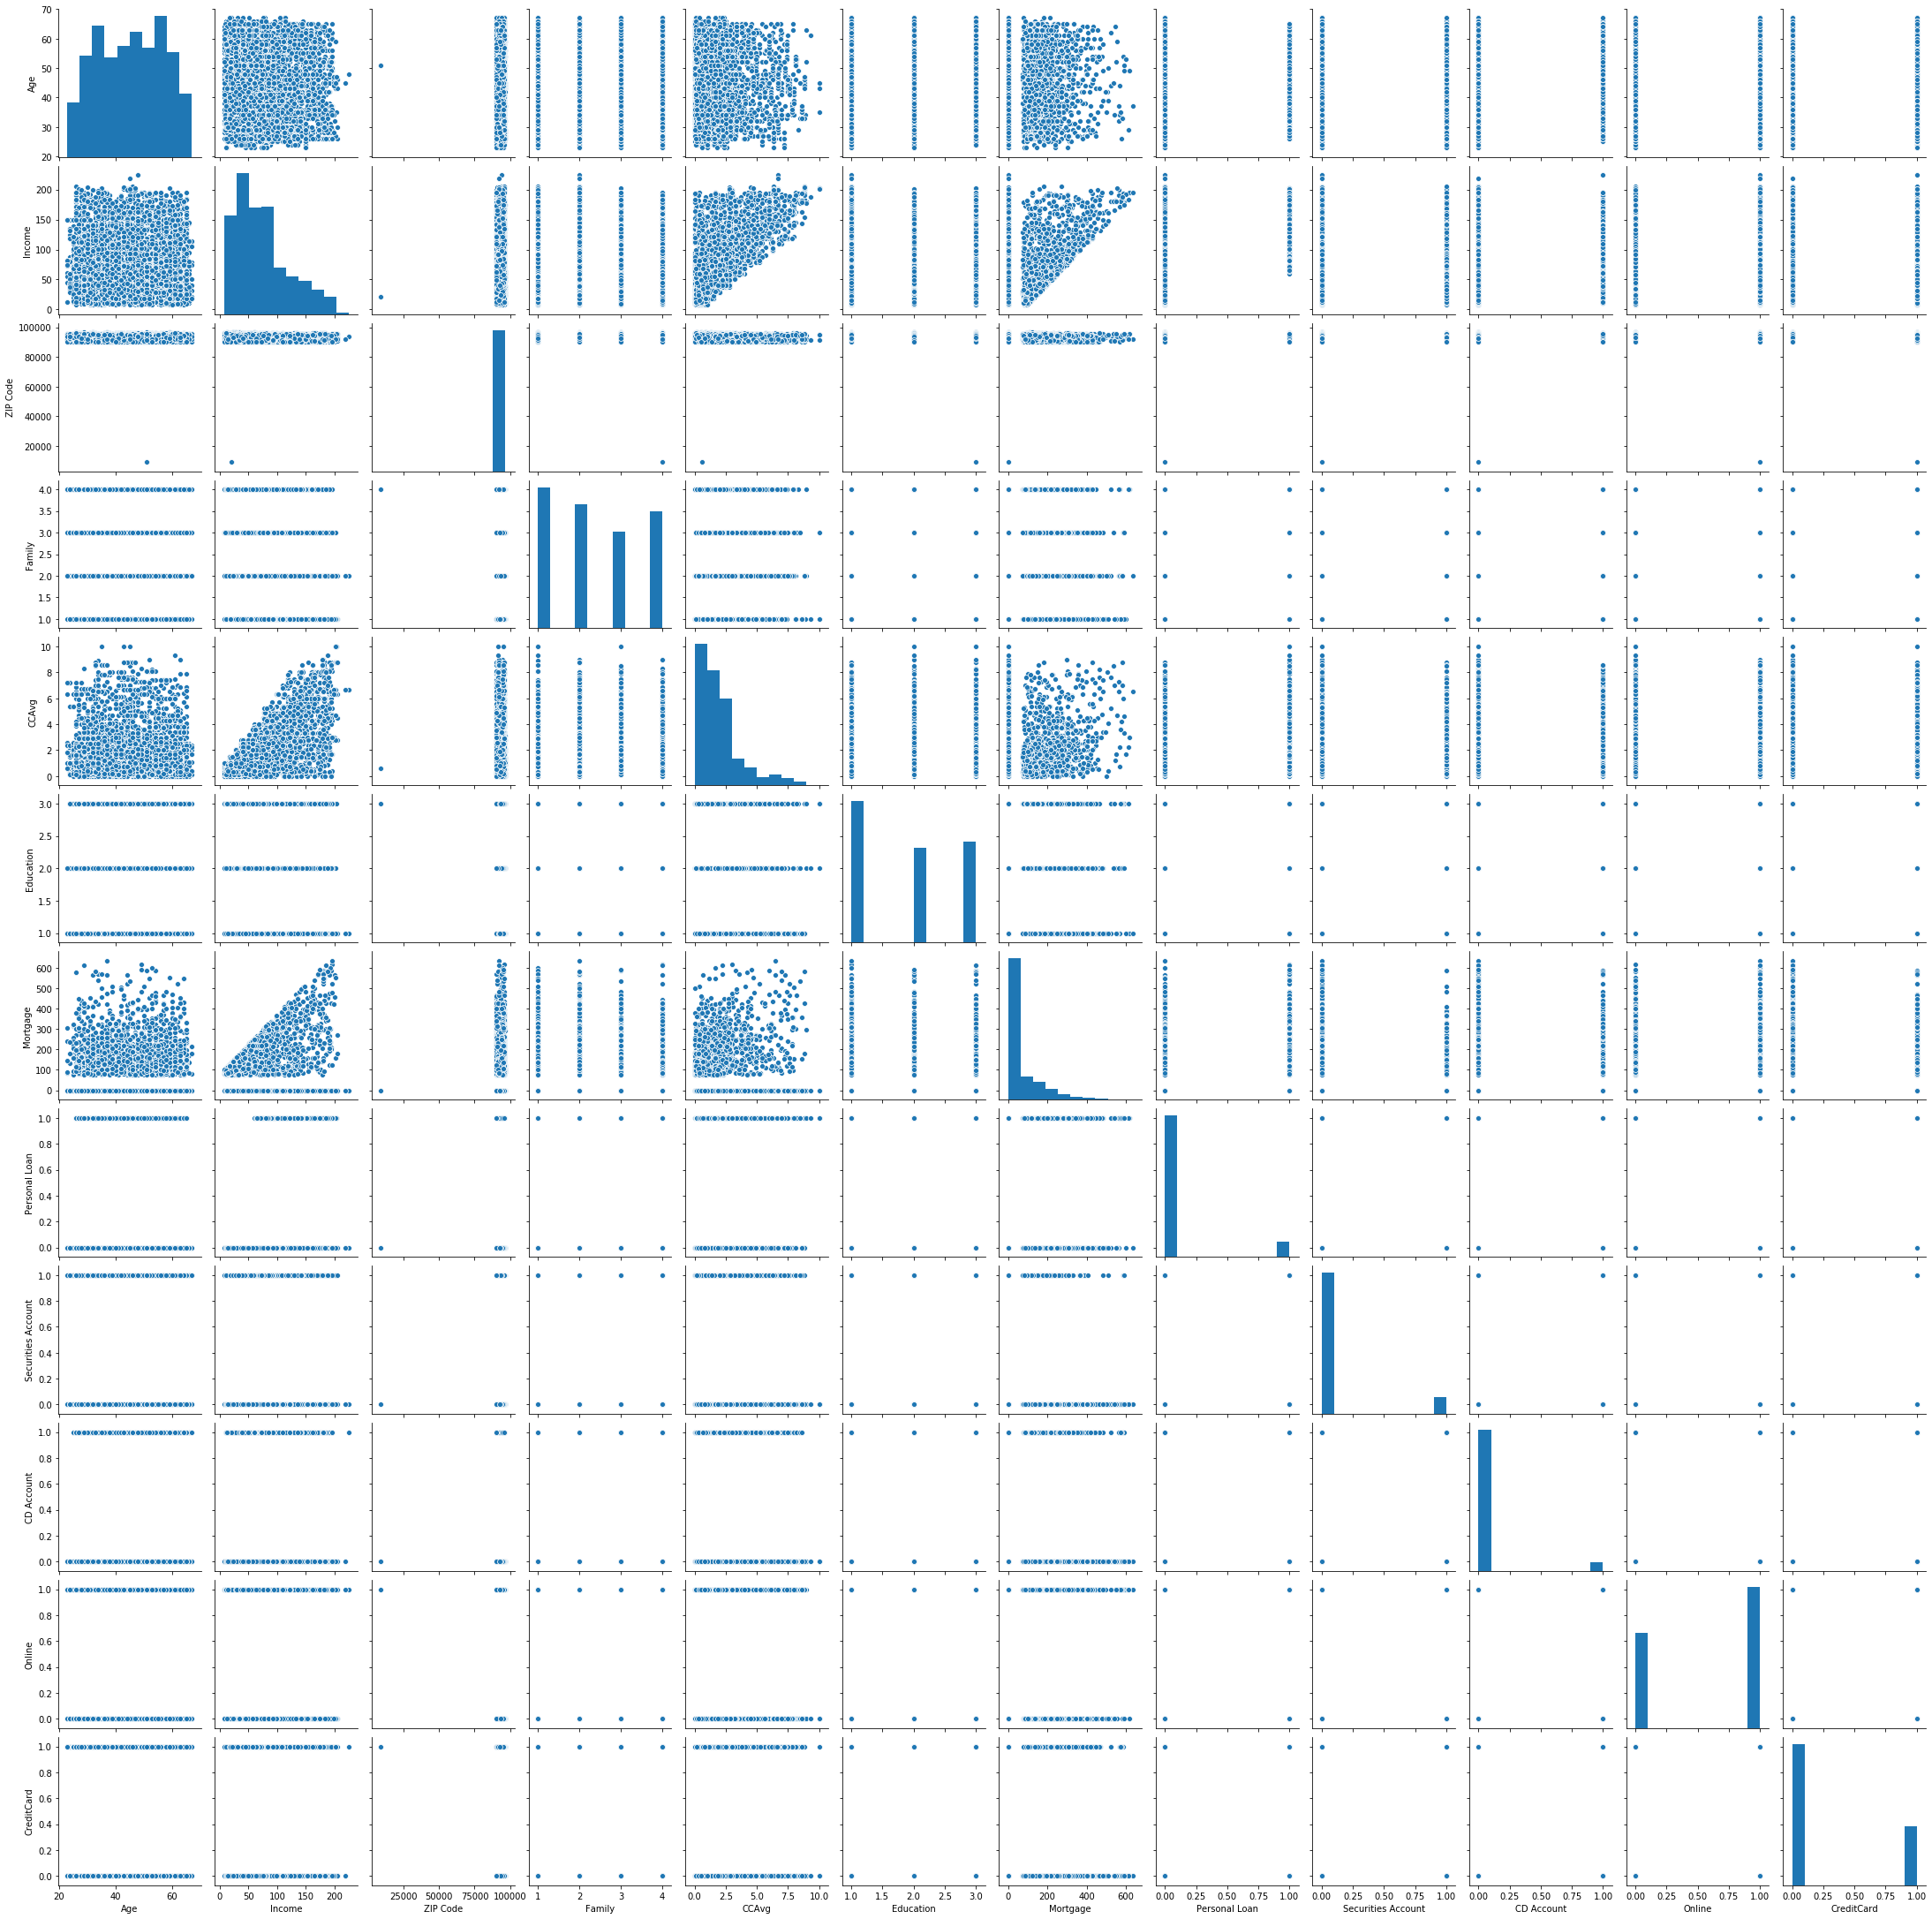

In [ ]:
sns.pairplot(data)

In [ ]:
data_X=data.loc[:,data.columns != "Personal Loan"]
data_Y=data[["Personal Loan"]]

# 4. TRANSFORMATION OF FEATURE VARIABLE

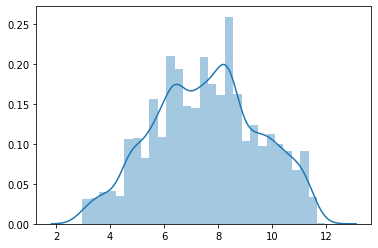

In [ ]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method="yeo-johnson", standardize=False)
pt.fit(data_X["Income"].values.reshape(-1,1))
sns.distplot(pt.transform(data_X["Income"].values.reshape(-1,1)))


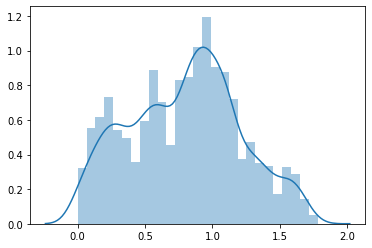

In [ ]:
pt=PowerTransformer(method="yeo-johnson", standardize=False)
pt.fit(data_X["CCAvg"].values.reshape(-1,1))
sns.distplot(pt.transform(data_X["CCAvg"].values.reshape(-1,1)))


In [ ]:
data_X["Mortgage_Int"]=pd.cut(data_X["Mortgage"],
                              bins=[0,100,200,300,400,500,600,700],
                              labels=[0,1,2,3,4,5,6],
                              include_lowest=True)
data_X.drop("Mortgage",axis=1,inplace=True)

In [ ]:
data_X.head()

,Age,Income,ZIP Code,Family,CCAvg,Education,Securities Account,CD Account,Online,CreditCard,Mortgage_Int
0,25,49,91107,4,1.6,1,1,0,0,0,0
1,45,34,90089,3,1.5,1,1,0,0,0,0
2,39,11,94720,1,1.0,1,0,0,0,0,0
3,35,100,94112,1,2.7,2,0,0,0,0,0
4,35,45,91330,4,1.0,2,0,0,0,1,0


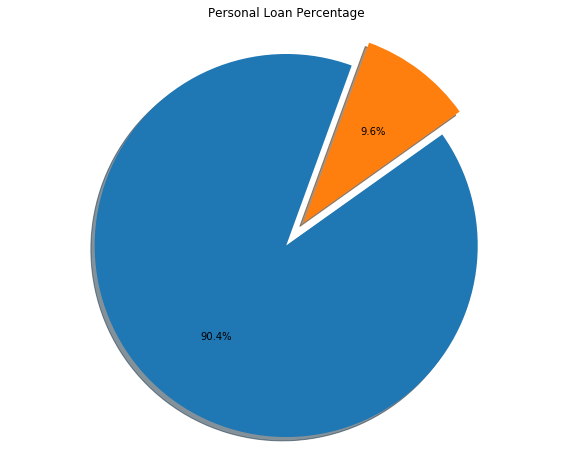

In [ ]:
## Univariate analysis
# 9.6% of all the applicants get approved for Personal Loan
tempDF=pd.DataFrame(data["Personal Loan"].value_counts()).reset_index()
tempDF.columns=["Labels","Personal Loan"]
fig1,ax1=plot.subplots(figsize=(10,8))
explode=(0,0.15)
ax1.pie(tempDF["Personal Loan"],explode=explode,autopct='%1.1f%%',
        shadow=True,startangle=70)
ax1.axis('equal')   #Equal aspect ratio ensures that pie is drawn as a circle
plot.title("Personal Loan Percentage")
plot.show()

# 5. Splitting the data using stratified sampling

In [ ]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_Y,test_Y =train_test_split(data_X,data_Y,test_size=0.3,stratify=data_Y,random_state=0)

In [ ]:
train_X.reset_index(drop=True, inplace=True);
test_X.reset_index(drop=True, inplace=True);
train_Y.reset_index(drop=True, inplace=True);
test_Y.reset_index(drop=True, inplace=True);

In [ ]:
train_X.head()

,Age,Income,ZIP Code,Family,CCAvg,Education,Securities Account,CD Account,Online,CreditCard,Mortgage_Int
0,51,24,94301,3,0.4,1,0,0,1,1,0
1,64,35,90266,1,1.5,2,1,0,0,0,0
2,52,31,94923,4,1.8,1,0,0,1,1,0
3,32,20,93106,1,0.5,3,0,0,1,0,1
4,62,54,91320,1,0.8,1,1,0,0,1,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scx = StandardScaler()
scy = StandardScaler()
train_X,test_X,train_Y,test_Y = train_test_split(data_X,data_Y,test_size = 0.3, random_state = 0,stratify = data_Y)
scx.fit_transform(train_X)
scx.transform(test_X)

array([[-0.97265109,  2.31851937, -0.06183544, ..., -1.19253735,
        -0.65376311, -0.47490853],
       [ 0.85873161,  0.16296952, -0.45946585, ..., -1.19253735,
        -0.65376311, -0.47490853],
       [ 0.24827071,  1.18631137,  0.6384359 , ..., -1.19253735,
        -0.65376311, -0.47490853],
       ...,
       [ 0.68431421, -0.92569202, -0.68832425, ..., -1.19253735,
         1.52960605,  0.68340496],
       [-0.97265109, -0.53377386,  0.38085975, ..., -1.19253735,
        -0.65376311, -0.47490853],
       [-0.01335539, -0.33781479,  0.38085975, ...,  0.83854816,
        -0.65376311, -0.47490853]])


# LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [ ]:
model.fit(train_X,train_Y)

F:\anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = model.predict(test_X)

In [ ]:
from sklearn import metrics

In [ ]:
print("MAE:",metrics.mean_absolute_error(test_Y,y_pred))
print("R2 score:",metrics.r2_score(test_Y,y_pred))

MAE: 0.08933333333333333
R2 score: -0.029375614552605844


In [ ]:
print(metrics.accuracy_score(test_Y,y_pred))

0.9106666666666666


In [ ]:
print(metrics.accuracy_score(train_Y,model.predict(train_X)))

0.9071428571428571


In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(test_Y,y_pred))

[[1318   38]
 [  96   48]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test_Y,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1356
           1       0.56      0.33      0.42       144

    accuracy                           0.91      1500
   macro avg       0.75      0.65      0.68      1500
weighted avg       0.90      0.91      0.90      1500



 So we can see that accuracy score for our test data is 91.07%.

# DECISION TREE

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf = clf.fit(train_X,train_Y)

In [ ]:
import graphviz
from sklearn import tree
dot_data = tree.export_graphviz(clf, out_file=None,feature_names=['Age','Income','Family','CCAvg','Online',
                                                                  'CreditCard','Education', 'Mortgage', 'Securities Account', 
                                                                  'CD Account','Personal Loan'],filled=True, rounded=True) 
graph= graphviz.Source(dot_data)

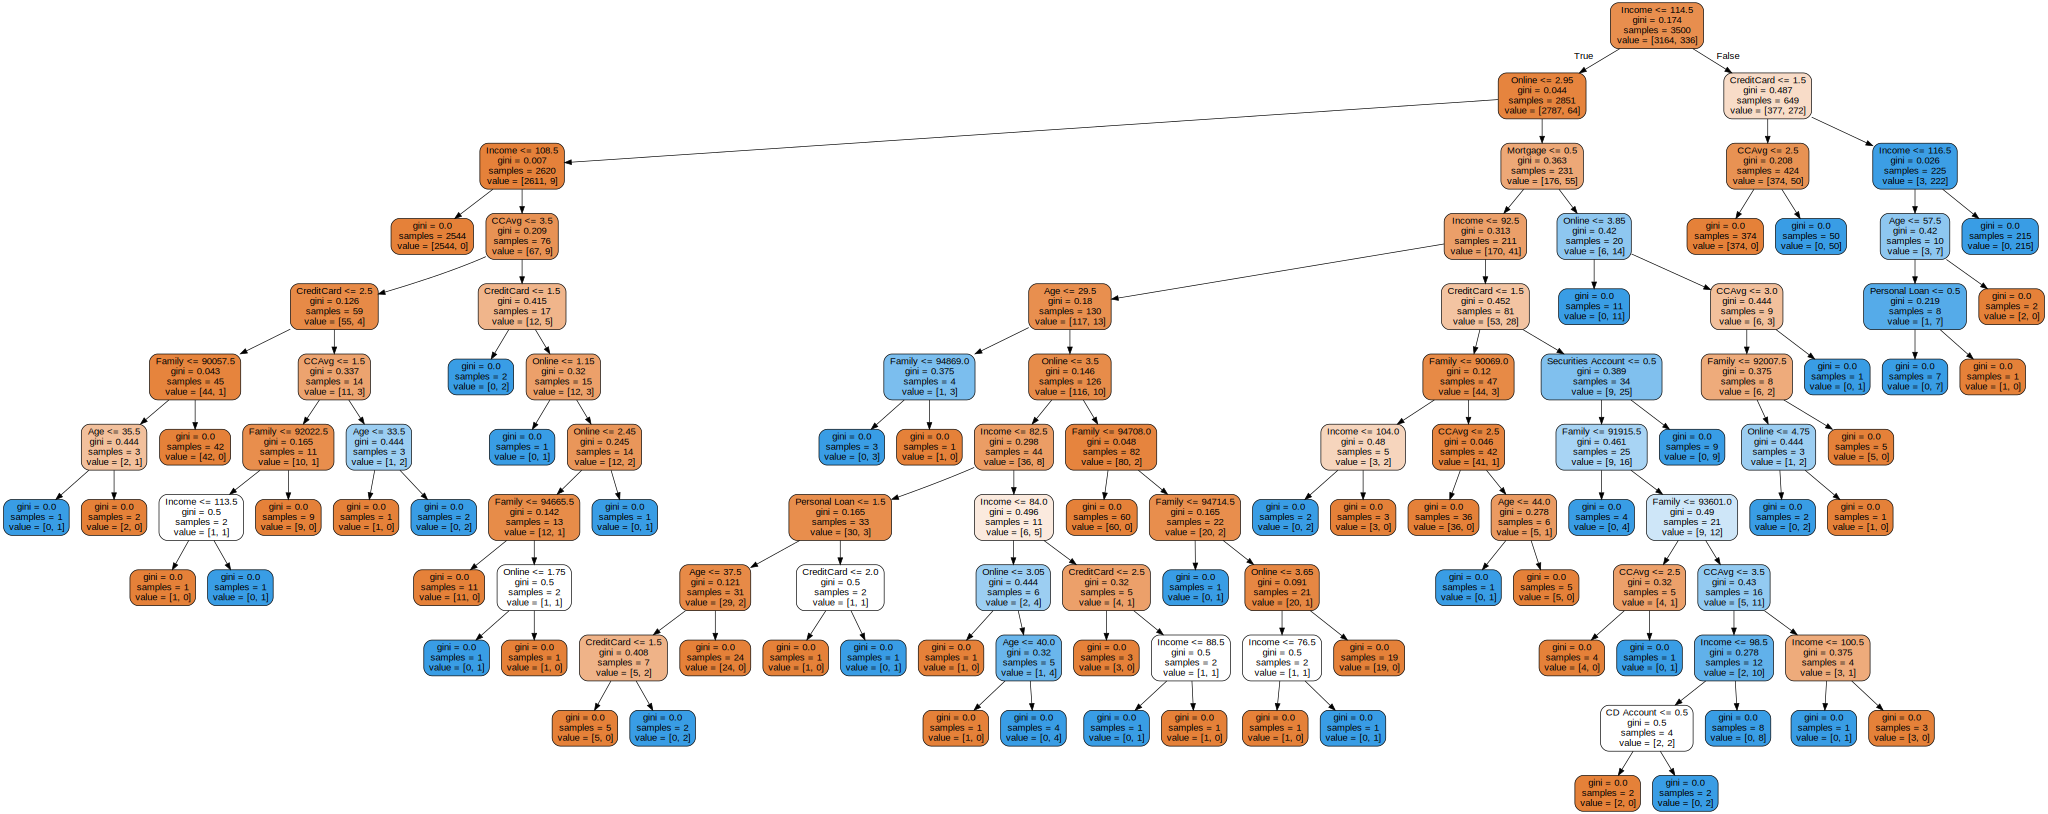

In [ ]:
graph

In [ ]:
y_pred = clf.predict(test_X)

In [ ]:
from sklearn import metrics
print("MAE:",metrics.mean_absolute_error(test_Y,y_pred))
print("R2 score:",metrics.r2_score(test_Y,y_pred))
print("Accuracy score for test data",metrics.accuracy_score(test_Y,y_pred))

MAE: 0.016666666666666666
R2 score: 0.8079523107177974
Accuracy score for test data 0.9833333333333333


In [ ]:
print("Accuracy score for train data",metrics.accuracy_score(train_Y, model.predict(train_X)))

Accuracy score for train data 0.9071428571428571


In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(test_Y,y_pred))

[[1346   10]
 [  15  129]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test_Y,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1356
           1       0.93      0.90      0.91       144

    accuracy                           0.98      1500
   macro avg       0.96      0.94      0.95      1500
weighted avg       0.98      0.98      0.98      1500



It is working very much better than previous algorithm. It is showing 97% accuracy score

# RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(train_X,train_Y)

F:\anaconda\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred = clf.predict(test_X)

In [ ]:
print("MAE:",metrics.mean_absolute_error(test_Y,y_pred))
print("R2 score:",metrics.r2_score(test_Y,y_pred))
print("Accuracy score for test data",metrics.accuracy_score(test_Y,y_pred))

MAE: 0.012
R2 score: 0.8617256637168141
Accuracy score for test data 0.988


In [ ]:
print("Accuracy score for train data",metrics.accuracy_score(train_Y,model.predict(train_X)))

Accuracy score for train data 0.9071428571428571


In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(test_Y,y_pred))

[[1352    4]
 [  14  130]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test_Y,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1356
           1       0.97      0.90      0.94       144

    accuracy                           0.99      1500
   macro avg       0.98      0.95      0.96      1500
weighted avg       0.99      0.99      0.99      1500



It is clearly showing that the model of random forest is working very good. 
The accuracy score is 98% for test data which is highest in all the algorithm we have used till now.
Also the confusion matrix is also better than the previous results.

# NAIVE BAYES

In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(train_X,train_Y)

F:\anaconda\lib\site-packages\sklearn\naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
y_pred = model.predict(test_X)

In [ ]:
print("MAE:",metrics.mean_absolute_error(test_Y,y_pred))
print("R2 score:",metrics.r2_score(test_Y,y_pred))
print("Accuracy score for test data",metrics.accuracy_score(test_Y,y_pred))

MAE: 0.10666666666666667
R2 score: -0.22910521140609652
Accuracy score for test data 0.8933333333333333


In [ ]:
print("Accuracy score for train data",metrics.accuracy_score(train_Y,model.predict(train_X)))

Accuracy score for train data 0.8837142857142857


In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(test_Y,y_pred))

[[1253  103]
 [  57   87]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test_Y,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94      1356
           1       0.46      0.60      0.52       144

    accuracy                           0.89      1500
   macro avg       0.71      0.76      0.73      1500
weighted avg       0.91      0.89      0.90      1500



The accuracy score for NAIVE BAYES algorithm  is not very good.
From all the models it is least till now. 
It is 88% which is less than other algorithms.

# KNN ALOGORITHM

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(train_X,train_Y)

F:\anaconda\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
y_pred = neigh.predict(test_X)

In [ ]:
print("MAE:",metrics.mean_absolute_error(test_Y,y_pred))
print("R2 score:",metrics.r2_score(test_Y,y_pred))
print("Accuracy score for test data",metrics.accuracy_score(test_Y,y_pred))

MAE: 0.10266666666666667
R2 score: -0.18301376597836794
Accuracy score for test data 0.8973333333333333


In [ ]:
print("Accuracy score for train data",metrics.accuracy_score(train_Y,model.predict(train_X)))

Accuracy score for train data 0.8837142857142857


In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(test_Y,y_pred))

[[1292   64]
 [  90   54]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test_Y,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      1356
           1       0.46      0.38      0.41       144

    accuracy                           0.90      1500
   macro avg       0.70      0.66      0.68      1500
weighted avg       0.89      0.90      0.89      1500



KNN ALGORITHM is working better than NAIVE BAYES algorithm. 
But it's performance is not so good when compared with other previous algorithms.

# MODEL COMPARISON

In [ ]:
X=data.drop(['Personal Loan'],axis=1)
y=data.pop('Personal Loan')

F:\anaconda\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  'random_state to its default (None), or set shuffle=True.',


KNN: 0.898600 (0.008902)
DT: 0.981400 (0.004652)
NB: 0.885600 (0.010385)


F:\anaconda\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  'random_state to its default (None), or set shuffle=True.',
F:\anaconda\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  'random_state to its default (None), or set shuffle=True.',
F:\anaconda\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  'random_state to its default (None), or set shuffle=True.',


RF: 0.986600 (0.003353)


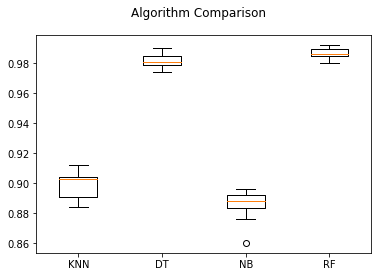

In [ ]:
from sklearn import model_selection

models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=12345)
	cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plot.boxplot(results)
ax.set_xticklabels(names)
plot.show()

# CONCLUSION: 

In the first step of this project we imported various libraries and our data. Than we found out various things about our data.

1) We have to make the model to predict whether a person will take personal loan or not.
2) We found that age and experience are highly correlated so we droped the experience column.
3) ID and ZIPcode were not contributing factors for a person to take loan so we dropped them.
4) The Income and CCAvg column were left skewed so we applied Power transformation to them to normalize them.
5) The mortgage column was also skewed but since it was discrete so rather than power transformation, we use binning technique.

After this we used several models to make predictions.

Accuracy Score of the predicted models are as follows:


RANDOM FOREST:
RF:  0.986600

DECISION TREE:
DT:  0.981400

KNN ALGORITHM:
KNN: 0.898600

NAIVE BAYES :
NB:  0.885600 
 

The aim of the universal bank is to convert there liability customers into loan customers. 
They want to set up a new marketing campaign.
Hence, they need information about the connection between the variables given in the data.
Four classification algorithms were used in this study. 
From the above graph , it seems like **DECISION TREE AND RANDOM FOREST** are among those algorithm 
which have the highest accuracy and we can choose those as our final model